In [10]:
import pandas as pd
import networkx as nx
import os

In [11]:
import random
random.seed(246)

In [12]:
files = pd.read_csv(os.path.join('comm-f2f-Resistance', 'network_list.csv'))
files.NUMBER_OF_PARTICIPANTS.value_counts(normalize=True)
# Just to check that the modularity classes does not coincide with the number of 
# opponents since that provides a lot of information about the game (about the zeros)
# It indeed does not coincide, so the modularity classes are meaningful
# Gephi shows: 35.03%, 25.72%, 25.72% and 13.53%

NUMBER_OF_PARTICIPANTS
8    0.467742
7    0.370968
6    0.129032
5    0.032258
Name: proportion, dtype: float64

In [13]:
players_graph = nx.read_gml(os.path.join('comm-f2f-Resistance', 'embeddings.gml'))

In [14]:
communities = nx.community.greedy_modularity_communities(players_graph, weight='weight', resolution=1.02)
len(communities)

3

In [15]:
[len(community) for community in communities]

[204, 199, 48]

In [16]:
node_color = {}
node_community = {}
community_color = {
    0: 'orange',
    1: 'cyan',
    2: 'magenta'
}
for node in players_graph.nodes():
    for i, community in enumerate(communities):
        if node in community:
            node_color[node] = community_color[i]
            node_community[node] = i
            break

In [17]:
players_graph.nodes()

NodeView(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '

KeyboardInterrupt: 

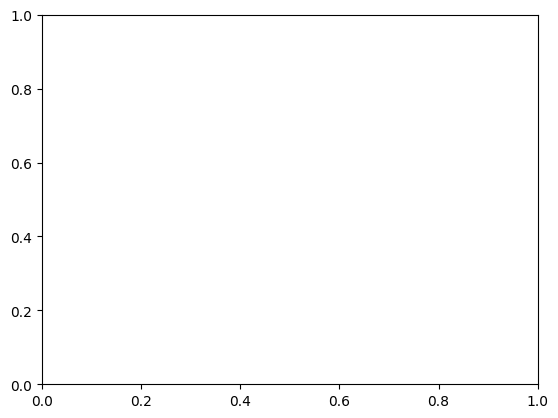

In [18]:
import matplotlib.pyplot as plt
from netgraph import Graph
fig, ax = plt.subplots()
Graph(
    players_graph,
    node_color=node_color, 
    node_edge_width=0,     
    edge_width=0.1,          
    edge_alpha=0.5,        
    node_layout='community',
    node_layout_kwargs=dict(node_to_community=node_community),
    #edge_layout='bundled',
    ax=ax,
)

In [ ]:
files = pd.read_csv(os.path.join('comm-f2f-Resistance', 'network_list.csv'))
rows = []
for index, data in files.iterrows():
    game = pd.read_csv(os.path.join('comm-f2f-Resistance', 'network', f'network{index}_weighted.csv'))

In [68]:
example = pd.read_csv(os.path.join('comm-f2f-Resistance', 'network', f'network{0}_weighted.csv'))
cols_to_drop = ['TIME']
cols_to_drop.extend(example.columns[example.columns.str.match(r'P._TO_LAPTOP')])
example.drop(columns=cols_to_drop, inplace=True)
conv = example.rolling(window=5).mean().dropna().reset_index(drop=True)
conv

,P1_TO_P1,P1_TO_P2,P1_TO_P3,P1_TO_P4,P1_TO_P5,P1_TO_P6,P1_TO_P7,P2_TO_P1,P2_TO_P2,P2_TO_P3,...,P6_TO_P5,P6_TO_P6,P6_TO_P7,P7_TO_P1,P7_TO_P2,P7_TO_P3,P7_TO_P4,P7_TO_P5,P7_TO_P6,P7_TO_P7
0,0.0,0.0606,0.1240,0.0026,0.0488,0.0296,0.0810,0.0154,0.0,0.1638,...,0.1110,0.0,0.1220,0.0790,0.2262,0.2116,0.0672,0.2190,0.1110,0.0
1,0.0,0.0676,0.1394,0.0038,0.0540,0.0324,0.1164,0.0108,0.0,0.1698,...,0.1010,0.0,0.1468,0.0828,0.2312,0.2248,0.0694,0.2324,0.1198,0.0
2,0.0,0.0812,0.1630,0.0056,0.0674,0.0418,0.1796,0.0078,0.0,0.1648,...,0.0926,0.0,0.1946,0.0900,0.1750,0.2390,0.0692,0.2528,0.1270,0.0
3,0.0,0.0944,0.1846,0.0066,0.0786,0.0496,0.2636,0.0050,0.0,0.1654,...,0.0728,0.0,0.1950,0.0852,0.1612,0.2356,0.0672,0.2396,0.1422,0.0
4,0.0,0.1020,0.1856,0.0066,0.0874,0.0564,0.3438,0.0012,0.0,0.1670,...,0.0708,0.0,0.2052,0.0740,0.1418,0.2092,0.0632,0.2132,0.2374,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7314,0.0,0.0944,0.3762,0.0000,0.1628,0.0098,0.3472,0.1028,0.0,0.1528,...,0.0512,0.0,0.0800,0.0746,0.1008,0.2896,0.0260,0.3132,0.1296,0.0
7315,0.0,0.0840,0.3324,0.0000,0.1374,0.0076,0.4314,0.1012,0.0,0.1314,...,0.0496,0.0,0.2178,0.0802,0.0986,0.2990,0.0200,0.3148,0.0660,0.0
7316,0.0,0.0774,0.3226,0.0000,0.1296,0.0074,0.4586,0.1012,0.0,0.1184,...,0.0502,0.0,0.3498,0.0894,0.1034,0.3070,0.0272,0.2274,0.0732,0.0
7317,0.0,0.0674,0.2792,0.0000,0.1068,0.0048,0.5400,0.0884,0.0,0.0942,...,0.0490,0.0,0.4938,0.0946,0.0948,0.3782,0.0292,0.1552,0.0584,0.0


In [103]:
from math import sqrt
def create_graph_instance(row: pd.Series) -> nx.Graph:
    """Create a graph representing a moment in the game."""
    players = round(sqrt(len(conv.iloc[0])))
    matrix = conv.iloc[0].values.reshape(-1, players)
    return nx.Graph(matrix)

from typing import Callable
# Python 3.12+ for the generic T, otherwise use:
# def calculate_metric(row: pd.Series, *, metric):
def calculate_metric[T](row: pd.Series, *, metric: Callable[[nx.Graph], T]) -> T:
    G = create_graph_instance(row)
    return metric(G)

def testing(row):
    return True

conv.apply(calculate_metric, axis=1, metric=testing)

0       True
1       True
2       True
3       True
4       True
        ... 
7314    True
7315    True
7316    True
7317    True
7318    True
Length: 7319, dtype: bool